In [43]:
import math
import pandas as pd
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from scipy import interpolate


#parameter: x returns f(x) 
def TaylorExp(x, n):
    y = 0
    for i in range(n):
        numerator = x**i
        denominator = math.factorial(i)
        y += numerator/denominator
    return y

#parameter: a list of x values, and size n
#returns a list of f(x) values
def getAllTaylorExp(x, n):
    y = []
    for i in x:
        y.append(TaylorExp(i,n))
    return y

def exp(x):
    return math.exp(x)

def getAllExp(x):
    y = []
    for i in x:
        y.append(exp(i))
    return y


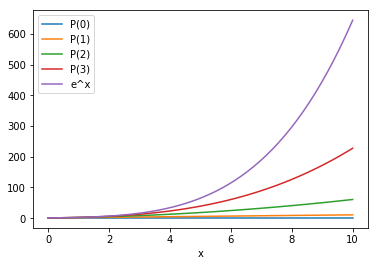

In [4]:
x = linspace(0,10)
P0 = getAllTaylorExp(x,1)
P1 = getAllTaylorExp(x,2)
P2 = getAllTaylorExp(x,3)
P3 = getAllTaylorExp(x,4)
P4 = getAllTaylorExp(x,5)
ex = getAllExp(x)
DF0=pd.DataFrame({'x':x,'P(0)':P0})
DF1=pd.DataFrame({'x':x,'P(1)':P1})
DF2=pd.DataFrame({'x':x,'P(2)':P2})
DF3=pd.DataFrame({'x':x,'P(3)':P3})
DF4=pd.DataFrame({'x':x,'e^x':P4})


ax = DF0.plot(x='x',y='P(0)')
DF1.plot(x='x',y='P(1)',ax=ax)
DF2.plot(x='x',y='P(2)',ax=ax)
DF3.plot(x='x',y='P(3)',ax=ax)
DF4.plot(x='x',y='e^x',ax=ax)



,Approximation e^7,Absolute Error,Relative Error
Linear Interpolation e^x,1692.19339,595.560232,0.543081


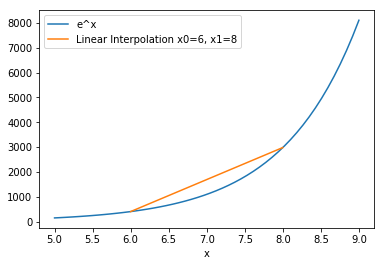

In [5]:
def linearInterpolation(x, x0, x1,function):
    lagrange0 = (x-x1)/(x0-x1)
    lagrange1 = (x-x0)/(x1-x0)
    return lagrange0*function(x0) + lagrange1*function(x1)

def linearInterpolationList(xList, x0, x1, function):
    y = []
    for i in xList:
        y.append(linearInterpolation(i,x0,x1,function))
    return y

def absoluteError(approximatedValue, xValue, function):
    return abs(function(xValue)-approximatedValue)

def relativeError(absoluteError, xValue, function):
    return absoluteError/function(xValue)

def getAbsoluteErrorList(approximatedList, xValues, function):
    absoluteErrorList = []
    index = 0
    for i in approximatedList:
        absoluteErrorList.append(absoluteError(i, xValues[index], function))
        index += 1
    return absoluteErrorList

def getRelativeErrorList(absoluteErrorList, xValues, function):
    relativeErrorList = []
    index = 0
    for i in absoluteErrorList:
        relativeErrorList.append(relativeError(i,xValues[index], function))
        index += 1
    return relativeErrorList

def getAllyValues(x,function):
    y = []
    for i in x:
        y.append(function(i))
    return y

x = linspace(5,9)
y = getAllExp(x)

#This will graph the function e^x from 5 to 9
df0=pd.DataFrame({'x':x,'e^x':y})
df1 = pd.DataFrame({'x':[6,8], 'Linear Interpolation x0=6, x1=8': [exp(6),exp(8)]})


ax = df0.plot(x='x',y='e^x')
df1.plot(x='x',y='Linear Interpolation x0=6, x1=8',ax=ax)

#This will produce the chart includeing absolute and relative error. 
absoluteErrorValue = absoluteError(linearInterpolation(7,6,8,exp), 7, exp)
relativeErrorValue = relativeError(absoluteErrorValue, 7, exp)

rows = ["Linear Interpolation e^x"]

df2 = pd.DataFrame({'Approximation e^7': pd.Series([linearInterpolation(7,6,8,exp)], index=rows),
                    'Absolute Error': pd.Series([absoluteErrorValue], index=rows),
                    'Relative Error': pd.Series([relativeErrorValue],index=rows)
                   })

df2

,e^7 Approximation,Absolute Error,Relative Error
"Approximation e^7 x0=0, x1=10",15418.826056,14322.192898,13.060149
"Approximation e^7 x0=6, x1=8",1692.193390,595.560232,0.543081


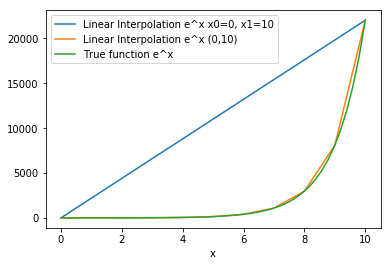

In [6]:
x = [0,1,2,3,4,5,6,7,8,9,10]

rows = ["Approximation e^7 x0=0, x1=10","Approximation e^7 x0=6, x1=8"]

absouluteError0 = absoluteError(linearInterpolation(7,0,10,exp), 7, exp)
absouluteError1 = absoluteError(linearInterpolation(7,6,8,exp), 7, exp)
relativeError0 = relativeError(absouluteError0, 7, exp)
relativeError1 = relativeError(absouluteError1, 7, exp)

df0 = pd.DataFrame({'x': [0,10], 'Linear Interpolation e^x x0=0, x1=10': [exp(0), exp(10)]})
df1 = pd.DataFrame({'x': x, 'Linear Interpolation e^x (0,10)':getAllExp(x)})
x = linspace(0,10)
df2 = pd.DataFrame({'x': x, 'True function e^x': getAllExp(x)})
df3 = pd.DataFrame({'e^7 Approximation': pd.Series([linearInterpolation(7,0,10,exp),linearInterpolation(7,6,8,exp)], index=rows),
                    'Absolute Error': pd.Series([absouluteError0, absouluteError1], index=rows),
                    'Relative Error': pd.Series([relativeError0, relativeError1],index=rows)
                   })

ax = df0.plot(x='x',y='Linear Interpolation e^x x0=0, x1=10')
df1.plot(x='x',y='Linear Interpolation e^x (0,10)',ax=ax)
df2.plot(x='x',y='True function e^x',ax=ax)

df3

,cos(x) Approximation,Absolute Error,Relative Error
x = 0.0,1.000000,0.000000,0.000000
x = 0.20408163265306123,1.143032,0.163784,0.167255
x = 0.40816326530612246,1.160164,0.242313,0.264000
x = 0.6122448979591837,1.079654,0.261294,0.319290
x = 0.8163265306122449,0.926671,0.241768,0.352997
x = 1.0204081632653061,0.723437,0.200419,0.383197
x = 1.2244897959183674,0.489372,0.149946,0.441764
x = 1.4285714285714286,0.241238,0.099492,0.701901
x = 1.6326530612244898,-0.006723,0.055094,-0.891245
x = 1.836734693877551,-0.242638,0.020177,-0.076772


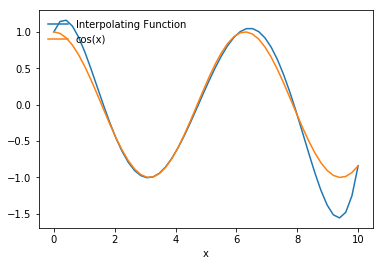

In [65]:
def lagrangeInterpolatingPolynomial(x, dataPoints, function):
    approximatedValue = 0
    for i in dataPoints:
        lagrangeValue = 1
        for j in dataPoints:
            if (i != j):
                numerator = (x - j)
                denominator = (i - j)
                lagrangeValue *= (numerator/denominator)
        approximatedValue += (function(i)*lagrangeValue)
    return approximatedValue

def getAllLagrangeInterpolatingPolynomial(xList, dataPoints, function):
    y = []
    for i in xList:
        y.append(lagrangeInterpolatingPolynomial(i,dataPoints,function))
    return y

def lagrangeInterpolateList(x,dataPoints,function):
    y = []
    for i in x:
        y.append(lagrangeInterpolatingPolynomial(i,dataPoints,function))
    return y

dataPoints = [0,2,4,6,8,10]
x = linspace(0,10)
y = getAllLagrangeInterpolatingPolynomial(x, dataPoints, math.cos)


df0 = pd.DataFrame({'x':x,'Interpolating Function':y})
df1 = pd.DataFrame({'x':linspace(0,10), 'cos(x)': getAllyValues(linspace(0,10),math.cos)})

rows = []
for i in x:
    rows.append("x = " + str(i))
    
ax = df0.plot(x = 'x',y = 'Interpolating Function')
df1.plot(x = 'x',y = 'cos(x)',ax=ax)
ax.legend(loc='upper left', frameon=False)

lagrangeInterpolationList = lagrangeInterpolateList(x, dataPoints, math.cos)
absoluteErrorList = getAbsoluteErrorList(lagrangeInterpolationList,x, math.cos)
relativeErrorList = getRelativeErrorList(absoluteErrorList,x, math.cos)


df3 = pd.DataFrame({'cos(x) Approximation': pd.Series(lagrangeInterpolationList,index = rows),
                    'Absolute Error': pd.Series(absoluteErrorList,index = rows),
                    'Relative Error': pd.Series(relativeErrorList,index = rows)
                   })
df3


,e^x Approximation,Absolute Error,Relative Error
x = 0.0,1.000000,0.000000e+00,0.000000
x = 0.30612244897959184,1.850402,4.922539e-01,0.362445
x = 0.6122448979591837,2.161851,3.172830e-01,0.172009
x = 0.9183673469387755,2.558299,5.310175e-02,0.021197
x = 1.2244897959183674,3.311497,9.093243e-02,0.026726
x = 1.5306122448979593,4.520783,1.002226e-01,0.021688
x = 1.836734693877551,6.238287,3.772450e-02,0.006011
x = 2.142857142857143,8.550713,2.695654e-02,0.003163
x = 2.4489795918367347,11.628808,5.228001e-02,0.004516
x = 2.7551020408163267,15.755686,3.304132e-02,0.002102


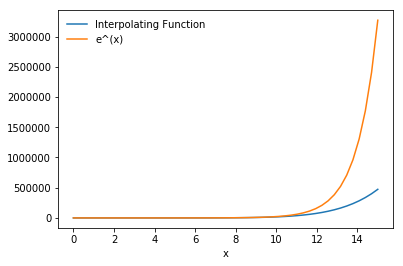

In [8]:
dataPoints = [0,1,2,3,4,5,6,7]
x = linspace(0,15)
y = getAllLagrangeInterpolatingPolynomial(x, dataPoints, exp)


df0 = pd.DataFrame({'x':x,'Interpolating Function':y})
df1 = pd.DataFrame({'x':x, 'e^(x)': getAllyValues(x,exp)})

rows = []
for i in x:
    rows.append("x = " + str(i))
    
ax = df0.plot(x = 'x',y = 'Interpolating Function')
df1.plot(x = 'x',y = 'e^(x)',ax=ax)
ax.legend(loc='upper left', frameon=False)

lagrangeInterpolationList = lagrangeInterpolateList(x, dataPoints, exp)
absoluteErrorList = getAbsoluteErrorList(lagrangeInterpolationList,x, exp)
relativeErrorList = getRelativeErrorList(absoluteErrorList,x, exp)


df3 = pd.DataFrame({'e^x Approximation': pd.Series(lagrangeInterpolationList,index = rows),
                    'Absolute Error': pd.Series(absoluteErrorList,index = rows),
                    'Relative Error': pd.Series(relativeErrorList,index = rows)
                   })
df3


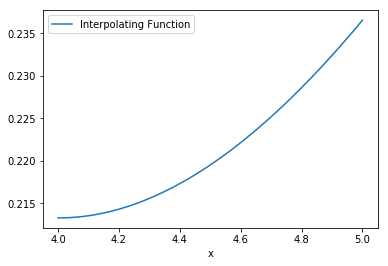

In [9]:
#Lagrange Interpolating Polynomials uses two lists x,f(x) list
def lagrangeInterpolating(x, xValList,yValList):
    aproxSum = 0
    index = 0
    for i in xValList:
        aproxValue = 1
        for j in xValList:
            if(i != j):
                numerator = (x - j)
                denominator = (i - j)
                aproxValue *= (numerator/denominator)
        aproxSum += aproxValue*yValList[index]
        index+=1
    return aproxSum

def getListLagrangeInterpolating(xList, xValList, yValList):
    y = []
    for i in xList:
        y.append(lagrangeInterpolating(i, xValList, yValList))
    return y
xValList = [4.1168,4.19236,4.20967,4.46908]
yValList = [0.213631,0.214232,0.21441,0.218788]

x = linspace(4,5)
y = getListLagrangeInterpolating(x, xValList, yValList)


df0 = pd.DataFrame({'x':x,'Interpolating Function':y})


ax = df0.plot(x = 'x',y = 'Interpolating Function')

0.23633967593624078
148.4131591025766


,cos(x) Neville's Method Approximation,Absolute Error,Relative Error
x = 0.0,1.000000,0.000000e+00,0.000000e+00
x = 0.20408163265306123,1.143032,1.637844e-01,1.672553e-01
x = 0.40816326530612246,1.160164,2.423126e-01,2.639998e-01
x = 0.6122448979591837,1.079654,2.612942e-01,3.192900e-01
x = 0.8163265306122449,0.926671,2.417684e-01,3.529968e-01
x = 1.0204081632653061,0.723437,2.004187e-01,3.831965e-01
x = 1.2244897959183674,0.489372,1.499463e-01,4.417644e-01
x = 1.4285714285714286,0.241238,9.949164e-02,7.019014e-01
x = 1.6326530612244898,-0.006723,5.509436e-02,-8.912450e-01
x = 1.836734693877551,-0.242638,2.017684e-02,-7.677209e-02


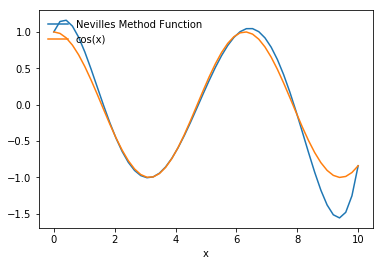

In [10]:
# Neville's Iterated Interpolation
def nevillesMethod(xValues, yValues,x):
    sizeN = len(xValues)
    q = np.zeros((sizeN,sizeN))
    for i in range(len(yValues)):
        q[i][0] = yValues[i]

    #Neville's method...
    for i in range(1,sizeN):
        for j in range(1, i+1):
            numerator = ((x - xValues[i - j])*(q[i][j - 1]) - (x - xValues[i])*(q[i - 1][j - 1]))
            demoninator = (xValues[i] - xValues[i - j])
            q[i][j] =  numerator/ demoninator 
    return q[sizeN-1][sizeN-1]

def getAllNevillesMethodValues(xValues, yValues, unKnownXValues):
    answers = []
    for i in unKnownXValues:
        answers.append(nevillesMethod(xValues, yValues, i))
    return answers

xdataPoints = [0,2,4,6,8,10]
ydataPoints = getAllyValues(xdataPoints,math.cos)

x = linspace(0,10)
y = getAllNevillesMethodValues(xdataPoints, ydataPoints, x)


df0 = pd.DataFrame({'x':x,'Nevilles Method Function':y})
df1 = pd.DataFrame({'x':x, 'cos(x)': getAllyValues(x,math.cos)})

rows = []
for i in x:
    rows.append("x = " + str(i))
    
ax = df0.plot(x = 'x',y = 'Nevilles Method Function')
df1.plot(x = 'x',y = 'cos(x)',ax=ax)
ax.legend(loc='upper left', frameon=False)

absoluteErrorList = getAbsoluteErrorList(y,x, math.cos)
relativeErrorList = getRelativeErrorList(absoluteErrorList,x, math.cos)


df3 = pd.DataFrame({'cos(x) Neville\'s Method Approximation': pd.Series(y,index = rows),
                    'Absolute Error': pd.Series(absoluteErrorList,index = rows),
                    'Relative Error': pd.Series(relativeErrorList,index = rows)
                   })
df3


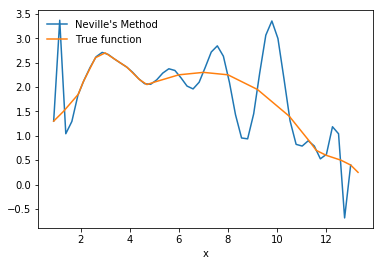

In [44]:
xdataPoints = [0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]
ydataPoints = [1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]

x = linspace(0.9,13)
y = getAllNevillesMethodValues(xdataPoints, ydataPoints, x)

df0 = pd.DataFrame({'x':x,'Neville\'s Method':y})
df1 = pd.DataFrame({'x':xdataPoints, 'True function': ydataPoints})

rows = []
for i in x:
    rows.append("x = " + str(i))
    
ax = df0.plot(x = 'x',y = 'Neville\'s Method')
df1.plot(x = 'x',y = 'True function',ax=ax)
ax.legend(loc='upper left', frameon=False)

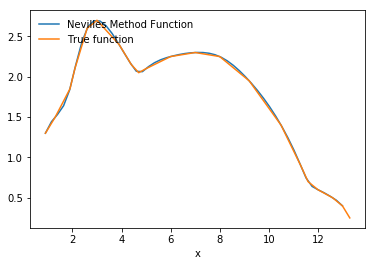

In [45]:
xdataPoints = [0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]
ydataPoints = [1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]
interpolatingFunction = interpolate.interp1d(xdataPoints,ydataPoints,"cubic")

x = linspace(0.9,13)
y = interpolatingFunction(x)


df0 = pd.DataFrame({'x':x,'Nevilles Method Function':y})
df1 = pd.DataFrame({'x':xdataPoints, 'True function': ydataPoints})

rows = []
for i in x:
    rows.append("x = " + str(i))
    
ax = df0.plot(x = 'x',y = 'Nevilles Method Function')
df1.plot(x = 'x',y = 'True function',ax=ax)
ax.legend(loc='upper left', frameon=False)

,Cubic Spline cos(x) Approximation,Absolute Error,Relative Error
x = 0.0,1.000000,0.000000,0.000000
x = 0.20408163265306123,1.143032,0.102843,0.105023
x = 0.40816326530612246,1.160164,0.176935,0.192770
x = 0.6122448979591837,1.079654,0.222076,0.271367
x = 0.8163265306122449,0.926671,0.239651,0.349905
x = 1.0204081632653061,0.723437,0.232452,0.444444
x = 1.2244897959183674,0.489372,0.204454,0.602351
x = 1.4285714285714286,0.241238,0.160529,1.132513
x = 1.6326530612244898,-0.006723,0.106137,-1.716953
x = 1.836734693877551,-0.242638,0.046982,-0.178763


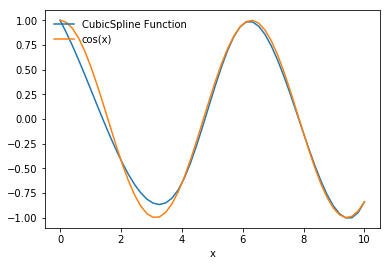

In [68]:
xdataPoints = [0,2,4,6,8,10]
ydataPoints = getAllyValues(xdataPoints,math.cos)
cubicSplineFunction = interpolate.interp1d(xdataPoints,ydataPoints,"cubic")
x = linspace(0,10)
y = cubicSplineFunction(x)


df0 = pd.DataFrame({'x':x,'CubicSpline Function':y})
df1 = pd.DataFrame({'x':x, 'cos(x)': getAllyValues(x, math.cos)})

rows = []
for i in x:
    rows.append("x = " + str(i))
    
ax = df0.plot(x = 'x',y = 'CubicSpline Function')
df1.plot(x = 'x',y = 'cos(x)',ax=ax)
ax.legend(loc='upper left', frameon=False)

absoluteErrorList = getAbsoluteErrorList(y,x, math.cos)
relativeErrorList = getRelativeErrorList(absoluteErrorList,x, math.cos)


df3 = pd.DataFrame({'Cubic Spline cos(x) Approximation': pd.Series(lagrangeInterpolationList,index = rows),
                    'Absolute Error': pd.Series(absoluteErrorList,index = rows),
                    'Relative Error': pd.Series(relativeErrorList,index = rows)
                   })
df3
